## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1  [Understanding the Dataset](#section301)<br/>
    - 3.2  [dtypes](#section302)<br/>
    - 3.3  [head](#section303)<br/>
    - 3.4  [describe](#section304)<br/>
    - 3.5  [sample](#section305)<br/>
    - 3.6  [Pandas profiling](#section306)<br/>
    - 3.7  [Initial observations](#section307)<br/>
    - 3.8  [Final observations](#section308)<br/><br/>
4. [Data normalization](#section4)</br>
    - 4.1 [Missing data and its imputation](#section401)<br/>
    - 4.2 [Drop columns](#section402)<br/>
    - 4.3 [Standardize column headers to lower case](#section403)<br/>
    - 4.4 [Rename column names](#section404)<br/>
    - 4.5 [Additional column moview_review ](#section405)<br/>
    - 4.6 [Split genre column in different columns](#section406)<br/>
    - 4.7 [Split actor column in different columns](#section407)<br/><br/>
   
5. [Identify Patterns in Data](#section5)<br/>
    - 5.1 [Distribution by metascore, rating, duration, revenue, votes and year](#section501)<br/>
    - 5.2 [Histograms](#section502)<br/>
    - 5.3 [Critic rating Vs Duration of movie](#section503)<br/>
    - 5.4 [Revenue Vs Duration of movie](#section504)<br/>
    - 5.5 [Count of movies released every year](#section505)<br/><br/>
6. [Questions](#section6)
    - 6.1 [Top 10 high revenue movies release  between 2006-2016](#section601)<br/>
    - 6.2 [Top 10 movies according to rating, revenue and votes?](#section602)<br/>
    - 6.3 [Movies classified according to movie review per year?](#section603)<br/>
    - 6.4 [Is critic rating in accordance to public rating (metascore)?](#section604)<br/>
    - 6.5 [How does critic rating impact revenue?](#section605)<br/>
    - 6.6 [Relation between revenue and metascore ](#section606)<br/>
    - 6.7 [How does duration affect rating?](#section607)
    - 6.8 [What is count of movies released per genre between 2006-2016?](#section608)<br/>
    - 6.9 [What are the top 10 genre according to movie count?](#section609)<br/><br/>
    
7. [Conclusions](#section7)<br/> 

<a id=section1></a>

### 1. Problem Statement

1000 Movies Dataset is a collection of movie data released from year 2006 to 2016. It consists of various attributes related to the movie like  the title of the film, the year of release , the genre, the rating , the duration of the film, the description of the film, actors, directors, etc 

This notebook analyses the data using the basic techniques of profiling in pandas.

Post analysis , we can conclude on the various factors that affect the revenue earned of the movie





<a id=section2></a>

### 2. Data loading and Description


This dataset is referred from this location.

URL : https://github.com/insaid2018/Term-1/tree/master/Data/Projects

It consists of 100 rows of data and 12 columns.
Below is the decription provided.


#### Import the libraries required

In [1]:
import sys 
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

import warnings                   
warnings.filterwarnings('ignore')

from subprocess import check_output 

#### Load Dataset

In [2]:
movies_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
movies = pd.DataFrame(movies_data)

<a id=section3></a>

### 3. Data Profiling

<a id='section301'></a>

#### 3.1 Understanding the  Dataset

#### Data Description 

In [3]:
print(movies.shape)

(1000, 12)


##### Data consists of 1000 rows and 12 columns. Below is the table showing description of columns

In [4]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 74.3+ KB
None


<a id='section302'></a>

#### 3.2 dtypes

In [5]:
movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

<a id='section303'></a>

#### 3.3 head

In [6]:
movies.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016                117   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016                108   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016                123   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
2     7.3  157606              138.12       62.0  
3     7.2   60545              270.32       59.0  
4     6.2  393727              325.02       40.0

<a id='section304'></a>

#### 3.4 describe

In [7]:
movies.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          872.000000  936.000000  
mean            82.956376   58.985043  
std            103.253540   17.194757  
min              0.000000   11.000000  
25%             13.270000   47.000000  
50%             47.985000   59.500000  
75%            113.715000   72.000000  
max            936.630000  100.000000

In [8]:
movies.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

#### As Seen , there are 2 columns Revenue (Millions) and Metascore with null values

<a id='section305'></a>

#### 3.5 Sample

<a id='section306'></a>

In [9]:
movies.sample(10) 

Rank                  Title                       Genre  \
472   473                   2012     Action,Adventure,Sci-Fi   
321   322               Lovesong                       Drama   
245   246         Les Misérables       Drama,Musical,Romance   
846   847                   Home  Animation,Adventure,Comedy   
625   626           Total Recall    Action,Adventure,Mystery   
372   373               Criminal          Action,Crime,Drama   
726   727  Friends with Benefits              Comedy,Romance   
285   286           Sucker Punch              Action,Fantasy   
971   972              Disturbia      Drama,Mystery,Thriller   
731   732                   Paul     Adventure,Comedy,Sci-Fi   

                                           Description         Director  \
472  A frustrated writer struggles to keep his fami...  Roland Emmerich   
321  The relationship between two friends deepens d...      So Yong Kim   
245  In 19th-century France, Jean Valjean, who for ...       Tom Hooper   
846  An alien on the run from his own people makes ...      Tim Johnson   
625  A factory worker, Douglas Quaid, begins to sus...      Len Wiseman   
372  In a last-ditch effort to stop a diabolical pl...     Ariel Vromen   
726  A young man and woman decide to take their fri...       Will Gluck   
285  A young girl is institutionalized by her abusi...      Zack Snyder   
971  A teen living under house arrest becomes convi...      D.J. Caruso   
731  Two British comic-book geeks traveling across ...     Greg Mottola   

                                                Actors  Year  \
472  John Cusack, Thandie Newton, Chiwetel Ejiofor,...  2009   
321  Riley Keough, Jena Malone, Jessie Ok Gray, Car...  2016   
245  Hugh Jackman, Russell Crowe, Anne Hathaway,Ama...  2012   
846  Jim Parsons, Rihanna, Steve Martin, Jennifer L...  2015   
625  Colin Farrell, Bokeem Woodbine, Bryan Cranston...  2012   
372  Kevin Costner, Ryan Reynolds, Gal Gadot, Gary ...  2016   
726  Mila Kunis, Justin Timberlake, Patricia Clarks...  2011   
285  Emily Browning, Vanessa Hudgens, Abbie Cornish...  2011   
971  Shia LaBeouf, David Morse, Carrie-Anne Moss, S...  2007   
731   Simon Pegg, Nick Frost, Seth Rogen, Mia Stallard  2011   

     Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
472                158     5.8  297984              166.11       49.0  
321                 84     6.4     616                0.01       74.0  
245                158     7.6  257426              148.78       63.0  
846                 94     6.7   77447              177.34       55.0  
625                118     6.3  210965               58.88       43.0  
372                113     6.3   38430               14.27       36.0  
726                109     6.6  286543               55.80       63.0  
285                110     6.1  204874               36.38       33.0  
971                105     6.9  193491               80.05        NaN  
731                104     7.0  201707               37.37       57.0

<a id='section306'></a>

#### 3.6 Pandas Profiling

#### Pre profiling gives us an idea about the various columns, its dataypes, statistical information

In [10]:
profile = pandas_profiling.ProfileReport(movies)
profile.to_file(outputfile="movies_before_preprocessing.html")

#### Before Profiling the data

<img src=".\images\profiling_before.jpg" /> 

<a id='section307'></a>

#### 3.7 Initial Observations

2 columns Revenue and Metascore has null values.

7 columns are numeric, 4 categorical and 1 text column.

Now we shall process the data to better understand the various attributes and how it can help in data exploration


<a id='section308'></a>

#### 3.8 Final Observations

•Dealing with missing values
•Dropping missing entries of Revenue
•Dropping missing values of Metascore
•Dropping column 'Description' as it has too many values and not really required.
•Dropping column 'Rank' as it is highly correlated. 
•Renaming columns Revenue (Millions) to Revenue and Runtime (Minutes) to Runtime .
•Converting all columns names to lower case
•Splitting genre and actor column values to different columns
•Adding 1 column named 'movie_review' to describe movie as Good/Bad/Better as per rating


<a id='section4'></a>

### 4.0 Data Normalization

- Dealing with missing values<br/>
- Dropping missing entries of __Revenue__
- Dropping missing values of __Metascore__
- Dropping column __'Description'__ as it has too many values and not really required.
- Dropping column __'Rank'__ as it is highly correlated. 
- Renaming columns __Revenue (Millions)__ to __Revenue__ and __Runtime (Minutes)__ to __Runtime__ .
- Converting all columns names to lower case
- Splitting genre and actor column values to different columns
- Adding 1 column named 'movie_review' to describe movie as Good/Bad/Better as per rating

    

<a id='section401'></a>

#### 4.1 Missing data and its imputation

In [11]:
movies=movies.dropna() 


<a id='section402'></a>

#### 4.2 Drop columns

In [12]:
movies.drop('Description',axis=1, inplace = True)
movies.drop('Rank',axis=1, inplace = True)

In [13]:
print(movies.columns)

Index(['Title', 'Genre', 'Director', 'Actors', 'Year', 'Runtime (Minutes)',
       'Rating', 'Votes', 'Revenue (Millions)', 'Metascore'],
      dtype='object')


<a id='section403'></a>

#### 4.3 Standardize column headers to lower case

In [14]:
# Column names to lower case
movies.columns = map(str.lower, movies.columns) 

<a id='section404'></a>

#### 4.4  Rename column names

In [15]:
#Rename columns
movies = movies.rename(columns = {'runtime (minutes)':'runtime'})
movies = movies.rename(columns = {'revenue (millions)':'revenue'})

In [16]:
print(movies.columns)

Index(['title', 'genre', 'director', 'actors', 'year', 'runtime', 'rating',
       'votes', 'revenue', 'metascore'],
      dtype='object')


In [17]:
movies.head()

title                     genre              director  \
0  Guardians of the Galaxy   Action,Adventure,Sci-Fi            James Gunn   
1               Prometheus  Adventure,Mystery,Sci-Fi          Ridley Scott   
2                    Split           Horror,Thriller    M. Night Shyamalan   
3                     Sing   Animation,Comedy,Family  Christophe Lourdelet   
4            Suicide Squad  Action,Adventure,Fantasy            David Ayer   

                                              actors  year  runtime  rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117     7.3   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108     7.2   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016      123     6.2   

    votes  revenue  metascore  
0  757074   333.13       76.0  
1  485820   126.46       65.0  
2  157606   138.12       62.0  
3   60545   270.32       59.0  
4  393727   325.02       40.0

<a id='section405'></a>

#### 4.5 Additional column moview_review

In [18]:
movies['movie_review'] =movies.apply(lambda x: 'Good' if x['rating'] >= 7.0 else('Not That Bad' if (x['rating'] < 7.0 and x['rating'] > 4.0) else 'Dont Watch'),axis=1)

In [19]:
movies.head()

title                     genre              director  \
0  Guardians of the Galaxy   Action,Adventure,Sci-Fi            James Gunn   
1               Prometheus  Adventure,Mystery,Sci-Fi          Ridley Scott   
2                    Split           Horror,Thriller    M. Night Shyamalan   
3                     Sing   Animation,Comedy,Family  Christophe Lourdelet   
4            Suicide Squad  Action,Adventure,Fantasy            David Ayer   

                                              actors  year  runtime  rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117     7.3   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108     7.2   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016      123     6.2   

    votes  revenue  metascore  movie_review  
0  757074   333.13       76.0          Good  
1  485820   126.46       65.0          Good  
2  157606   138.12       62.0          Good  
3   60545   270.32       59.0          Good  
4  393727   325.02       40.0  Not That Bad

<a id='section406'></a>

#### 4.6 Split actor column in different columns

In [20]:
movies_actors = movies['actors'].str.split(',', expand=True).rename(columns=lambda x: f"actor_{x+1}")
movies = pd.concat([movies, movies_actors], axis=1, sort=False)

<a id='section407'></a>

#### 4.7  Split genre column in different columns

In [21]:
movies_genre = movies['genre'].str.split(',', expand=True).rename(columns=lambda x: f"genre_{x+1}")
movies =pd.concat([movies, movies_genre], axis=1, sort=False)

In [22]:
movies.head()

title                     genre              director  \
0  Guardians of the Galaxy   Action,Adventure,Sci-Fi            James Gunn   
1               Prometheus  Adventure,Mystery,Sci-Fi          Ridley Scott   
2                    Split           Horror,Thriller    M. Night Shyamalan   
3                     Sing   Animation,Comedy,Family  Christophe Lourdelet   
4            Suicide Squad  Action,Adventure,Fantasy            David Ayer   

                                              actors  year  runtime  rating  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014      121     8.1   
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124     7.0   
2  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117     7.3   
3  Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108     7.2   
4  Will Smith, Jared Leto, Margot Robbie, Viola D...  2016      123     6.2   

    votes  revenue  metascore  movie_review              actor_1  \
0  757074   333.13       76.0          Good          Chris Pratt   
1  485820   126.46       65.0          Good         Noomi Rapace   
2  157606   138.12       62.0          Good         James McAvoy   
3   60545   270.32       59.0          Good  Matthew McConaughey   
4  393727   325.02       40.0  Not That Bad           Will Smith   

                 actor_2               actor_3              actor_4  \
0             Vin Diesel        Bradley Cooper          Zoe Saldana   
1   Logan Marshall-Green    Michael Fassbender      Charlize Theron   
2        Anya Taylor-Joy   Haley Lu Richardson         Jessica Sula   
3      Reese Witherspoon       Seth MacFarlane   Scarlett Johansson   
4             Jared Leto         Margot Robbie          Viola Davis   

     genre_1    genre_2  genre_3  
0     Action  Adventure   Sci-Fi  
1  Adventure    Mystery   Sci-Fi  
2     Horror   Thriller     None  
3  Animation     Comedy   Family  
4     Action  Adventure  Fantasy

 #### Drop column actor and genre since the data is split in multiple columns

In [23]:
movies.drop('actors',axis=1, inplace = True)
movies.drop('genre',axis=1, inplace = True)

In [24]:
movies.head()

title              director  year  runtime  rating  \
0  Guardians of the Galaxy            James Gunn  2014      121     8.1   
1               Prometheus          Ridley Scott  2012      124     7.0   
2                    Split    M. Night Shyamalan  2016      117     7.3   
3                     Sing  Christophe Lourdelet  2016      108     7.2   
4            Suicide Squad            David Ayer  2016      123     6.2   

    votes  revenue  metascore  movie_review              actor_1  \
0  757074   333.13       76.0          Good          Chris Pratt   
1  485820   126.46       65.0          Good         Noomi Rapace   
2  157606   138.12       62.0          Good         James McAvoy   
3   60545   270.32       59.0          Good  Matthew McConaughey   
4  393727   325.02       40.0  Not That Bad           Will Smith   

                 actor_2               actor_3              actor_4  \
0             Vin Diesel        Bradley Cooper          Zoe Saldana   
1   Logan Marshall-Green    Michael Fassbender      Charlize Theron   
2        Anya Taylor-Joy   Haley Lu Richardson         Jessica Sula   
3      Reese Witherspoon       Seth MacFarlane   Scarlett Johansson   
4             Jared Leto         Margot Robbie          Viola Davis   

     genre_1    genre_2  genre_3  
0     Action  Adventure   Sci-Fi  
1  Adventure    Mystery   Sci-Fi  
2     Horror   Thriller     None  
3  Animation     Comedy   Family  
4     Action  Adventure  Fantasy

<a id='section311'></a>

### 3.11 Post  Profiling

In [25]:
profile = pandas_profiling.ProfileReport(movies)
profile.to_file(outputfile="movies_after_preprocessing.html")

#### After Profiling the data

<img src=".\images\profiling_after.jpg" /> 

<a id='section5'></a>

## 5. Identifying patterns

<a id='section501'></a>

#### 5.1 Distribution by metascore, rating, duration, revenue, votes and year

In [26]:
movies_data=movies.copy(deep=True)

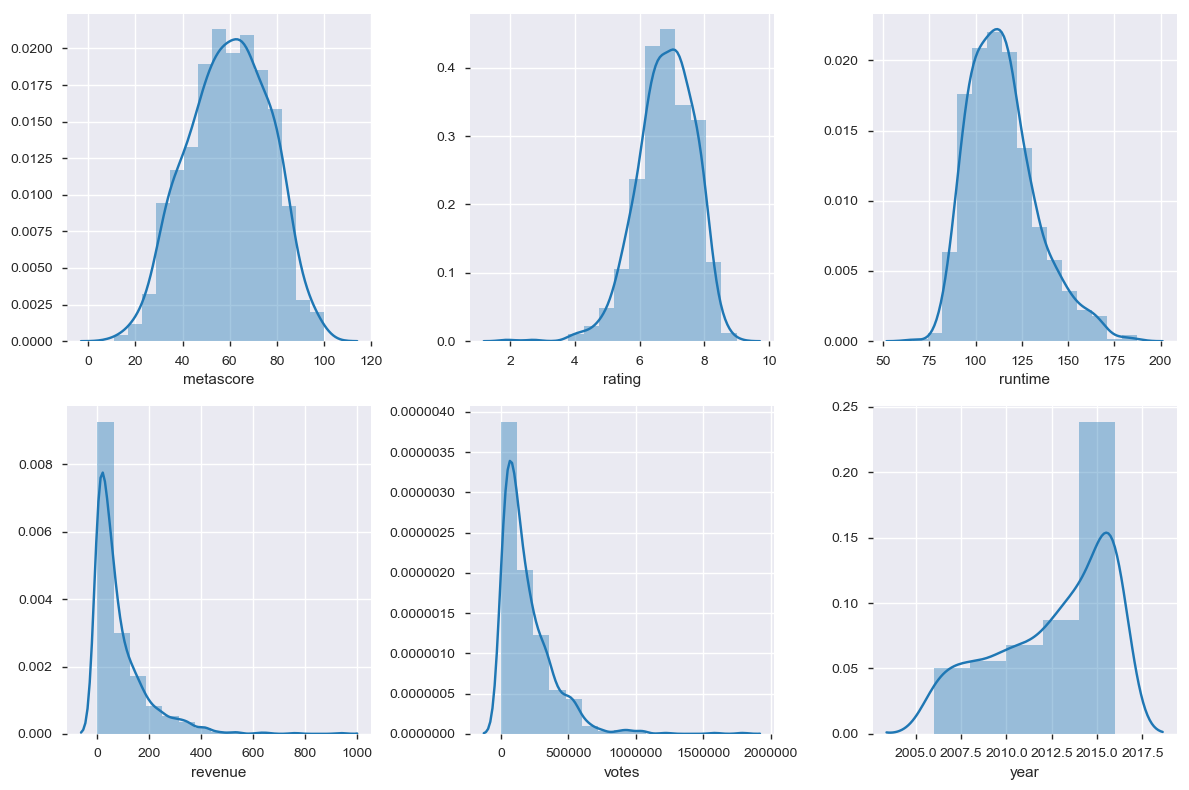

In [27]:
## dist plots
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 8)

m1 = sns.distplot(movies_data.metascore, bins=15, ax=axes[0, 0])
m2 = sns.distplot(movies_data.rating, bins=15, ax=axes[0, 1])
m3 = sns.distplot(movies_data.runtime, bins=15, ax=axes[0, 2])
m4 = sns.distplot(movies_data.revenue, bins=15, ax=axes[1, 0])
m5 = sns.distplot(movies_data.votes, bins=15, ax=axes[1, 1])
m6 = sns.distplot(movies_data.year, bins=5, ax=axes[1, 2])

plt.tight_layout()

#### Observations:<br>
 - Metascore: Most of the audience ratings are between 6/10 and 8.5/10.<br>
 - Ratings: Most critics ratings are between 60/100 and 80/100.<br>
 - Duration of the movie: a large number of films have a duration of 100 to 125 minutes.<br>
 - Revenue: Most movies are worth between 0 and 100 million dollars.<br>
 - Number of votes: Most votes are between 0 and 470000 votes.<br>
 - Year: Ther was a significant rise in movie production from 2013 -2016.<br>



<a id='section502'></a>

#### 5.2 Histograms

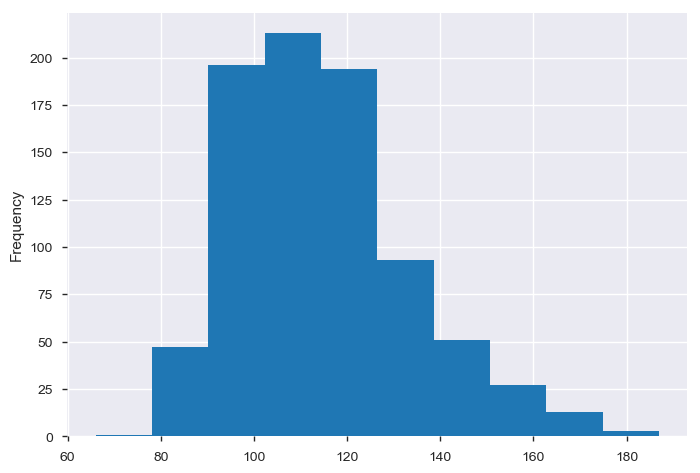

In [28]:
movies_data['runtime'].plot.hist()

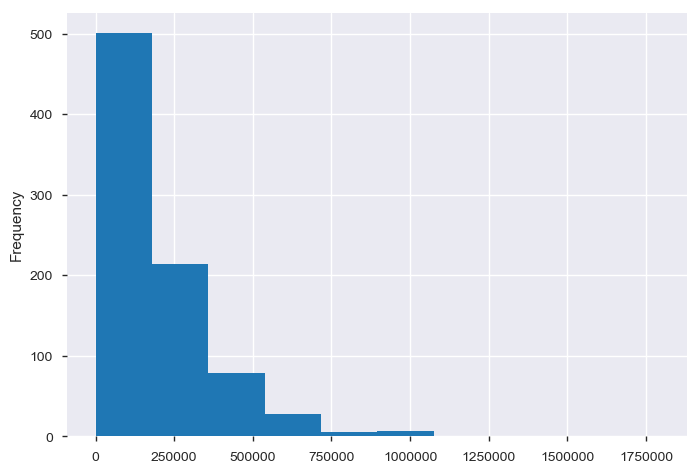

In [29]:
movies_data['votes'].plot.hist()

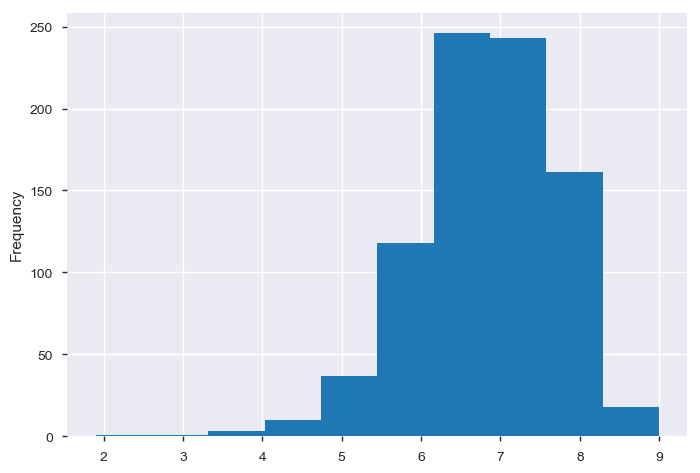

In [30]:
movies_data['rating'].plot.hist()

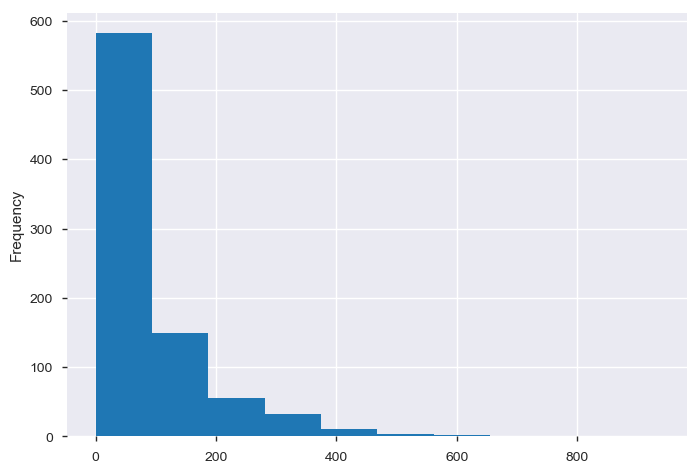

In [31]:
movies_data['revenue'].plot.hist()

<a id='section503'></a>

#### 5.3 Critic rating Vs Duration of movie

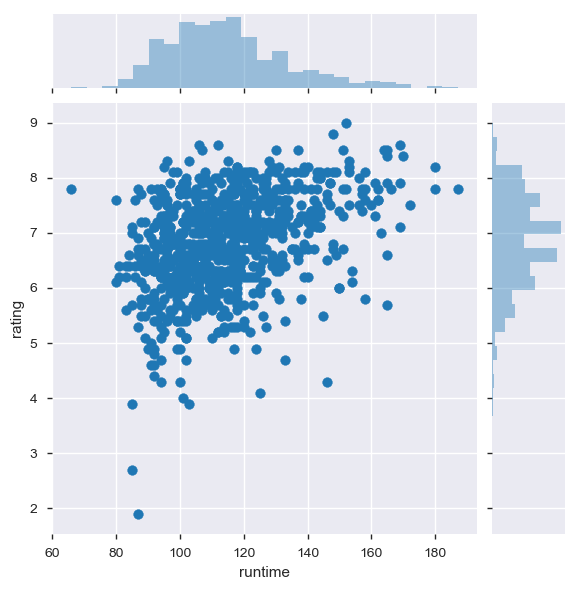

In [32]:
j1 = sns.jointplot(data=movies_data, y='rating', x='runtime')

On this graph, we note that for films between 90 minutes and 120 minutes, the ratings of the critics are more concentrated and vary between 40/100 and 85/100

<a id='section504'></a>

#### 5.4 Revenue Vs Duration of movie

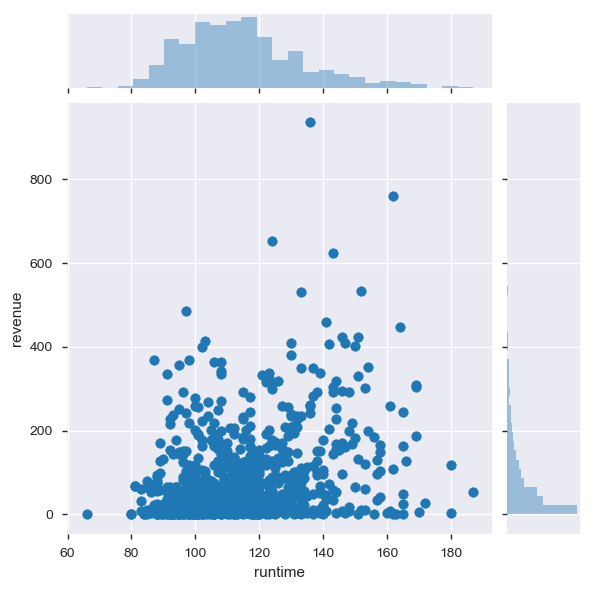

In [33]:
j2 = sns.jointplot(data=movies_data, y='revenue', x='runtime')

<a id='section505'></a>

#### 5.5 Count of movies released every year

Text(0.5, 1.0, 'Count of movies released from 2006-2016.')

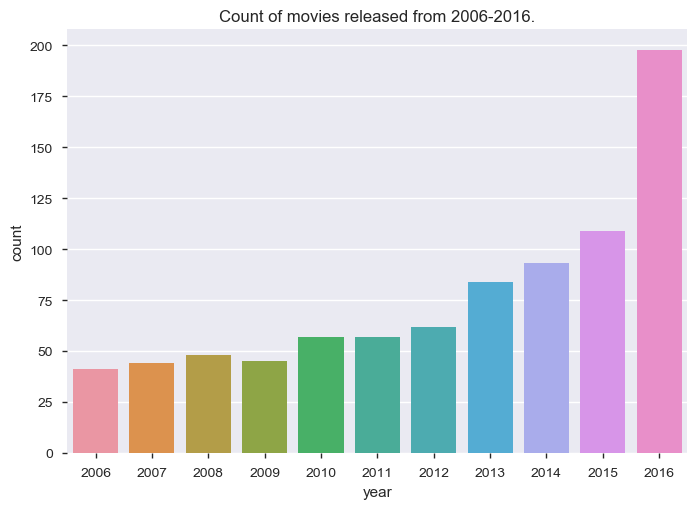

In [34]:
movies.groupby(['year'])['year'].count()
sns.countplot(x='year', data=movies).set_title('Count of movies released from 2006-2016.')

#### Here we can see since 2013 there was an increase in release of movies per year

<a id ='section6'></a>

## 6.0 Questions

<a id ='section601'></a>

#### 6.1 Top 10 high revenue movies release  between 2006-2016

In [35]:
df_10_movies = movies.sort_values(by ='revenue',ascending=False)
df_10_movies.head(10)[['title','director', 'revenue', 'rating', 'genre_1']]

title           director  revenue  \
50   Star Wars: Episode VII - The Force Awakens        J.J. Abrams   936.63   
87                                       Avatar      James Cameron   760.51   
85                               Jurassic World    Colin Trevorrow   652.18   
76                                 The Avengers        Joss Whedon   623.28   
54                              The Dark Knight  Christopher Nolan   533.32   
12                                    Rogue One     Gareth Edwards   532.17   
119                                Finding Dory     Andrew Stanton   486.29   
94                      Avengers: Age of Ultron        Joss Whedon   458.99   
124                       The Dark Knight Rises  Christopher Nolan   448.13   
578             The Hunger Games: Catching Fire   Francis Lawrence   424.65   

     rating    genre_1  
50      8.1     Action  
87      7.8     Action  
85      7.0     Action  
76      8.1     Action  
54      9.0     Action  
12      7.9     Action  
119     7.4  Animation  
94      7.4     Action  
124     8.5     Action  
578     7.6     Action

<a id='section403'></a>

<a id='section6.2'></a>

####  6.2 Top 10 movies according to rating, revenue and votes

In [36]:
print ("**************Rating*************")
print (movies.sort_values(by='rating', ascending=False).head(10)['genre_1'].value_counts())
print ("*************Revenue*************")
print (movies.sort_values(by='revenue', ascending=False).head(10)['genre_1'].value_counts())
print ("*************Votes*************")
print (movies.sort_values(by='votes', ascending=False).head(10)['genre_1'].value_counts())

**************Rating*************
Action       3
Drama        3
Animation    1
Biography    1
Adventure    1
Crime        1
Name: genre_1, dtype: int64
*************Revenue*************
Action       9
Animation    1
Name: genre_1, dtype: int64
*************Votes*************
Action       5
Adventure    2
Drama        2
Crime        1
Name: genre_1, dtype: int64


<a id='section603'></a>

#### 6.3 Movies classified according to movie review per year

Text(0.5, 1.0, 'Factor plot for good better worst movies')

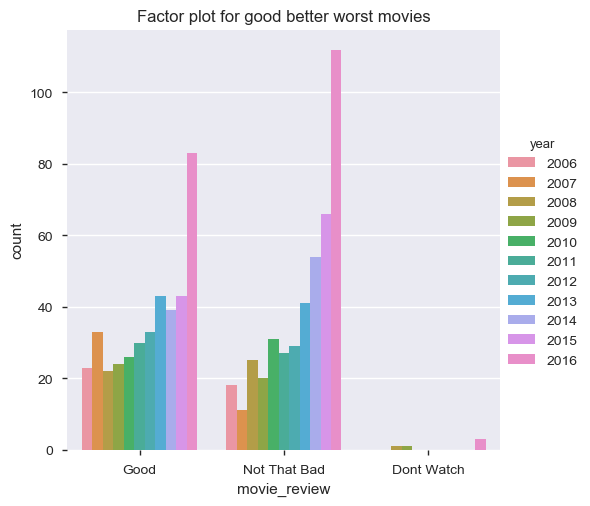

In [37]:
# plot for worst, better, good movies
df2=movies.filter(["title","genre","year" ,"movie_review"])
df2.groupby(['year','movie_review'])['year'].count()
sns.factorplot('movie_review', hue='year', kind='count', data=df2);
plt.title('Factor plot for good better worst movies')

<a id ='section604'></a>

#### 6.4 Is critic rating in accordance to public rating (metascore)

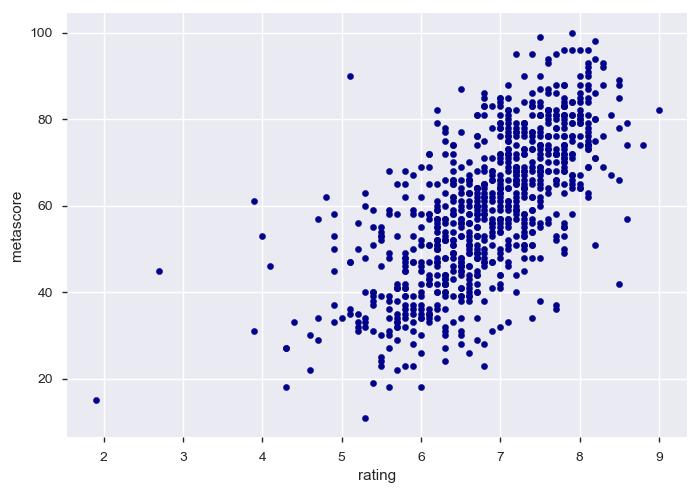

In [38]:
df3=movies.filter(["metascore",'rating','revenue'])
ax1 = df3.plot.scatter(x='rating',y='metascore',c='DarkBlue')

As seen critic rating is almost similar to public rating i.e. metascore

<a id ='section605'></a>

#### 6.5 How does critic rating impact revenue?

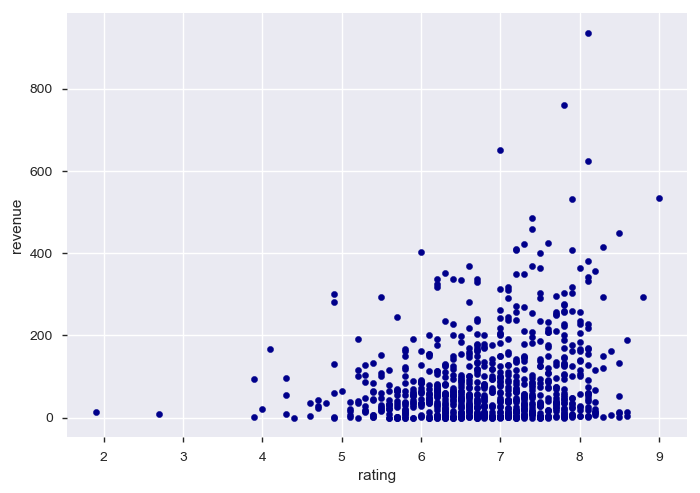

In [39]:
df3=movies.filter(["metascore",'rating','revenue'])
ax1 = df3.plot.scatter(x='rating',y='revenue',c='DarkBlue')

As noted, there is a high possibility that higher is the rating, higher is revenue earned.

<a id ='section606'></a>

#### 6.6 Relation between revenue and metascore

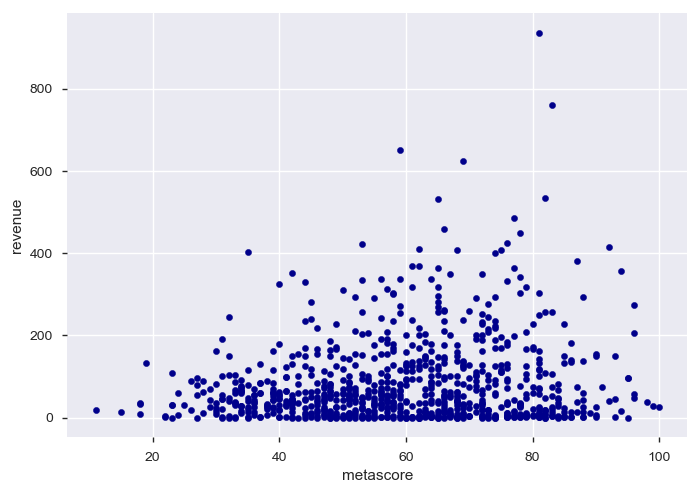

In [40]:
df3=movies.filter(["metascore",'rating','revenue'])
ax1 = df3.plot.scatter(x='metascore',y='revenue',c='DarkBlue')

<a id ='section407'></a>

As noted, metascore does affect the revenue.Since the metascore is high people liked the movie hence the revenue high

<a id='section607'></a>

#### 6.7 How does duration affect rating

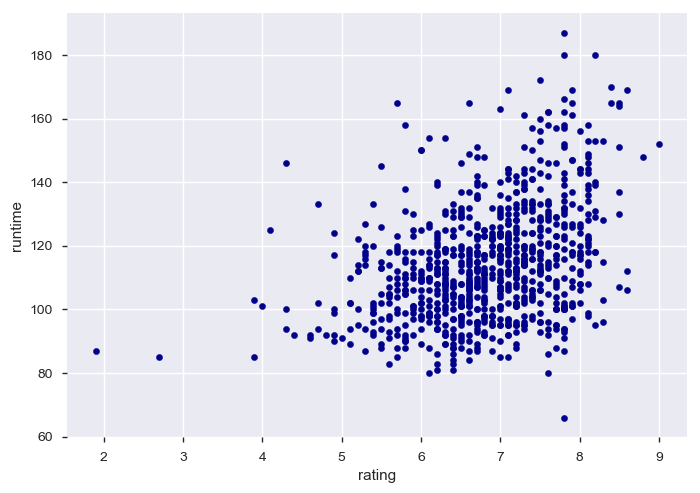

In [41]:
df4=movies.filter(["metascore",'rating','revenue','runtime'])
ax2 = df4.plot.scatter(x='rating',y='runtime',c='DarkBlue')

<a id='section608'></a>

####  6.8 What is count of movies released per genre between 2006-2016?

In [42]:
movies_data=movies.copy(deep=True)
movie_genres = pd.concat([movies['genre_1'], movies['genre_2'], movies['genre_3']]).unique()
unique_genres = movie_genres[movie_genres != None]


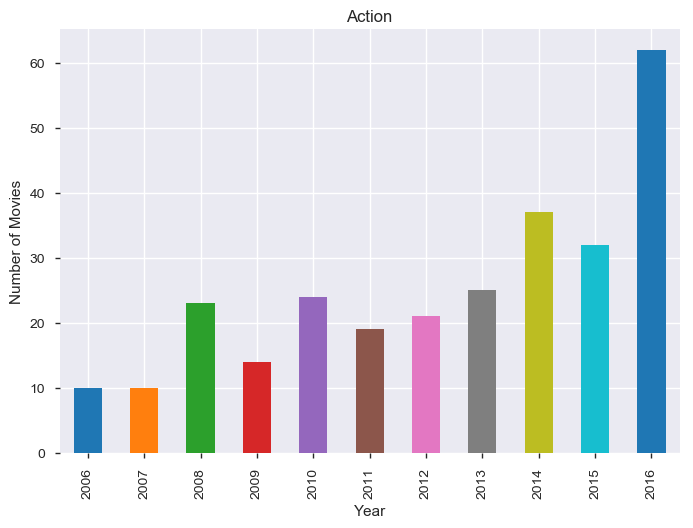

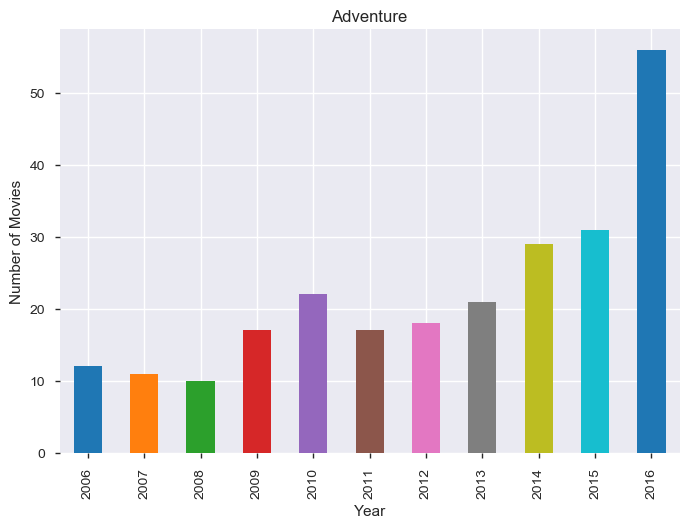

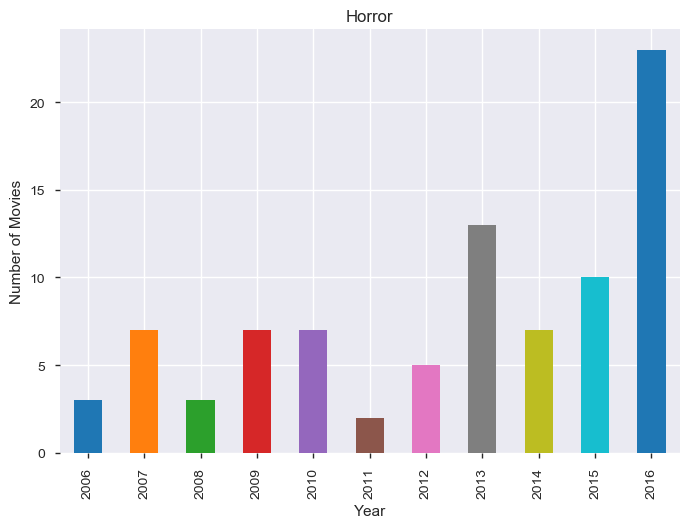

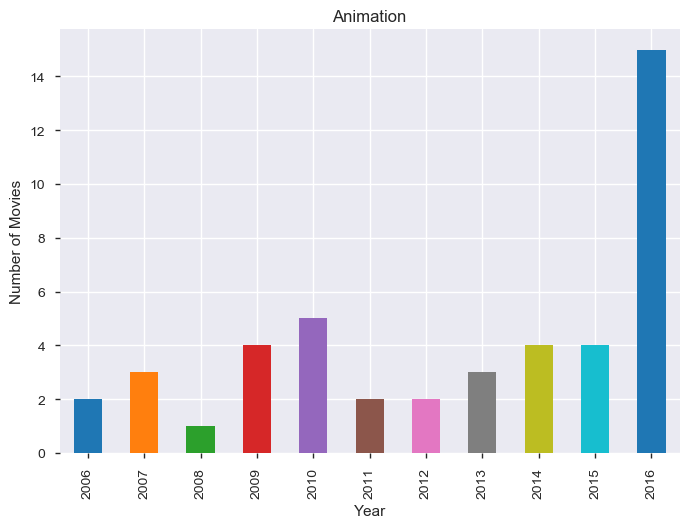

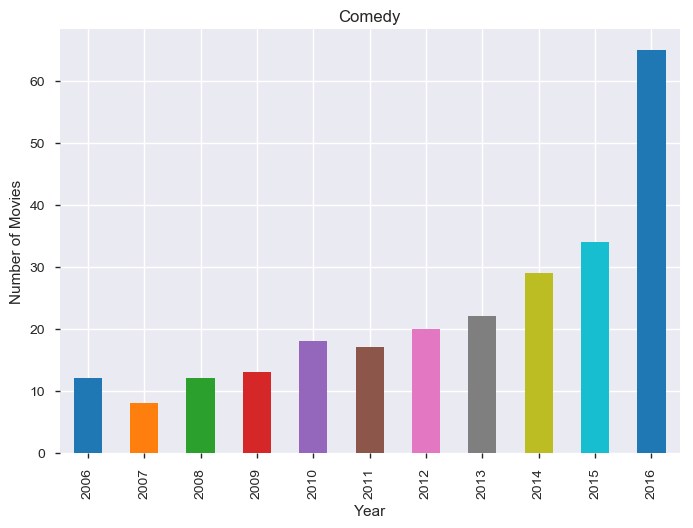

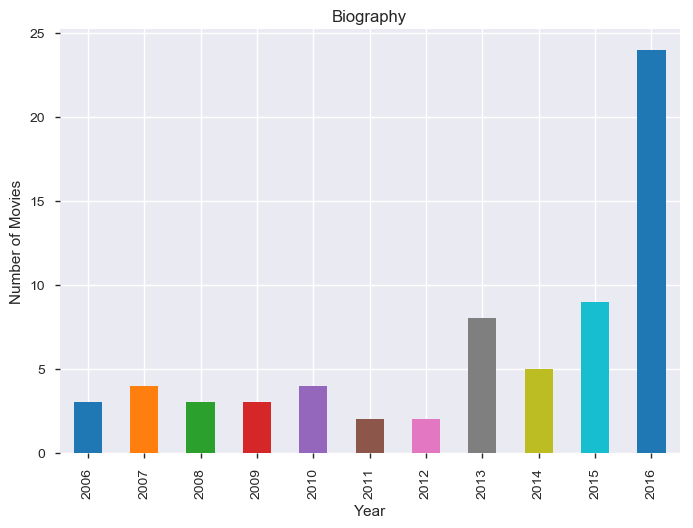

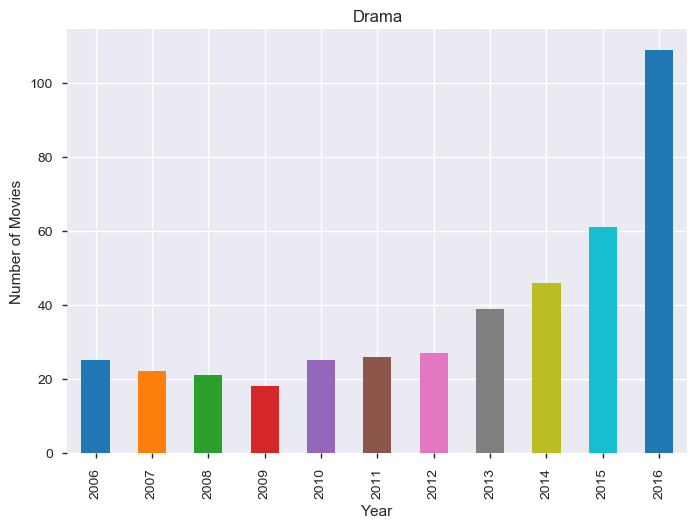

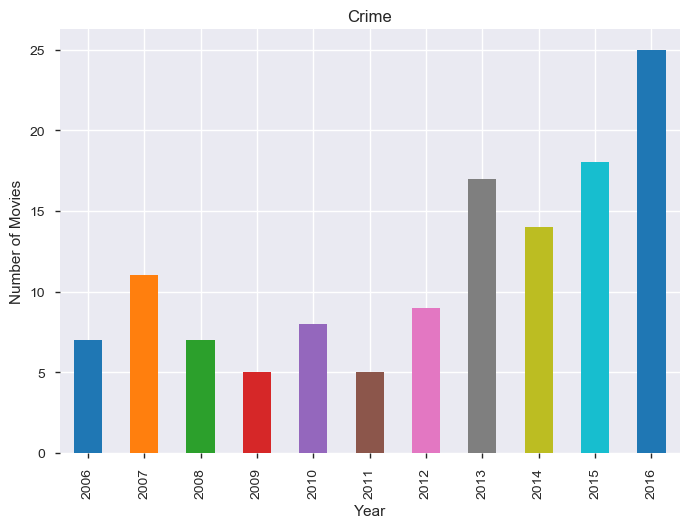

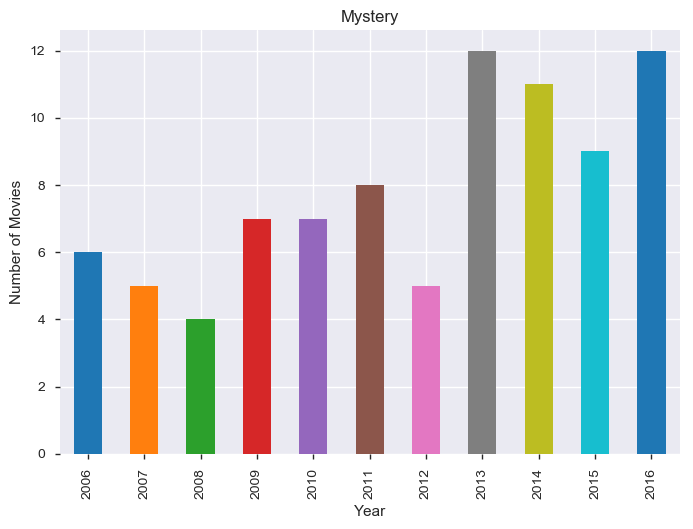

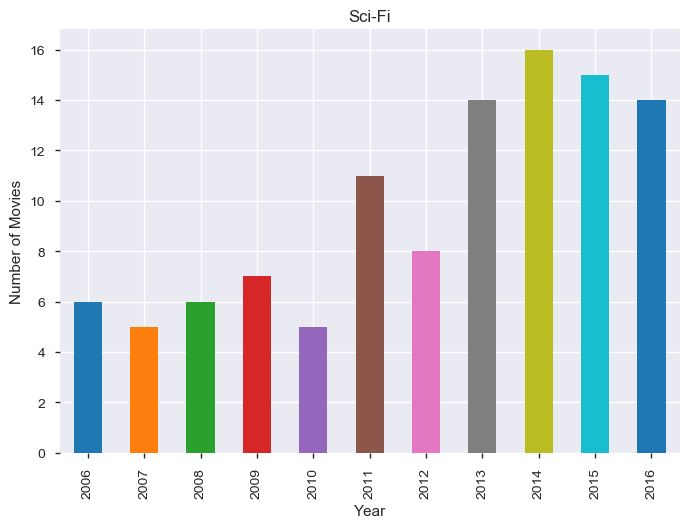

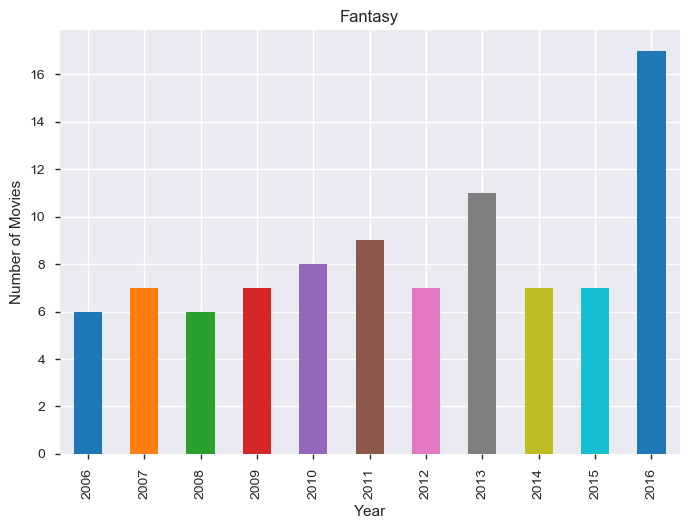

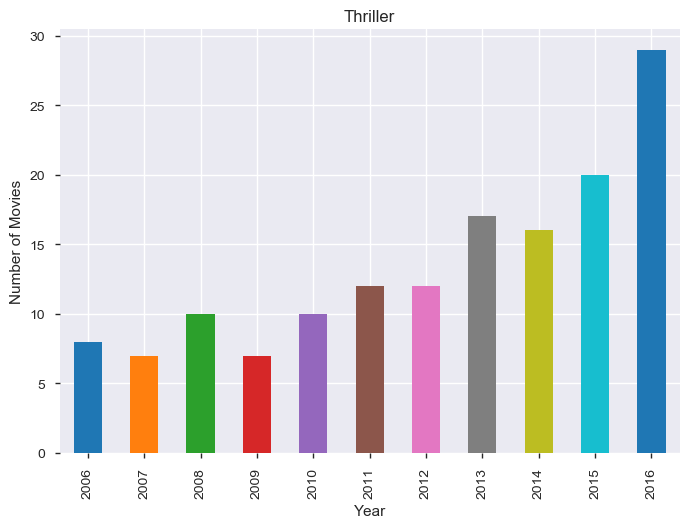

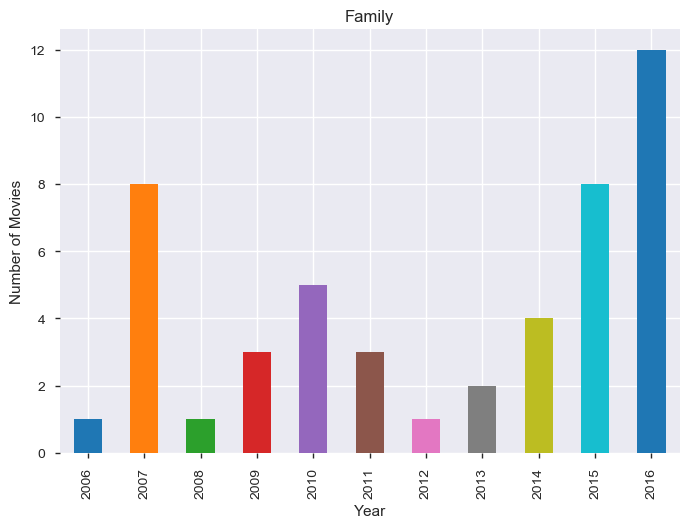

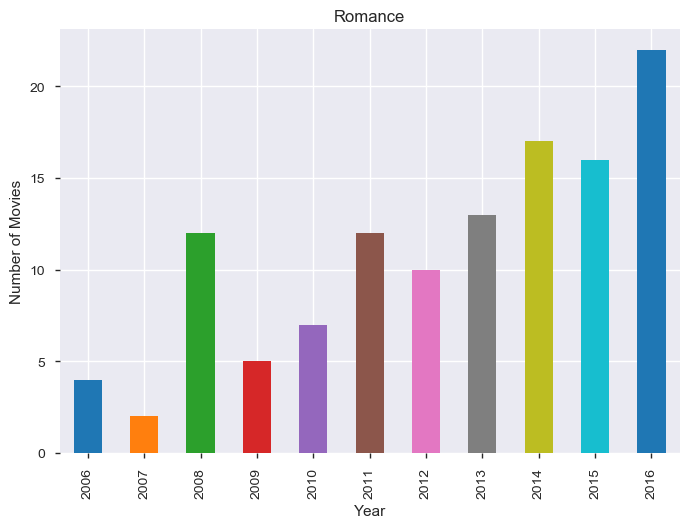

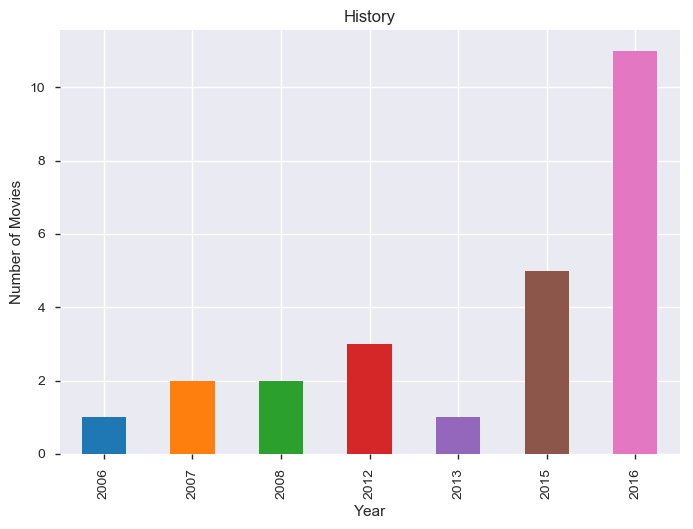

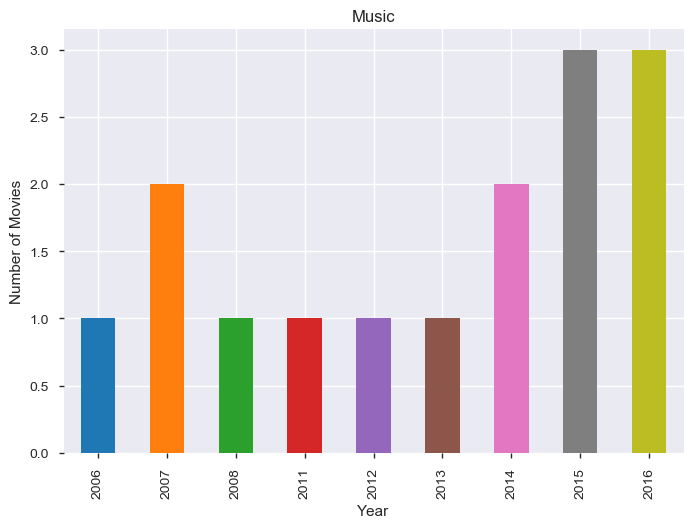

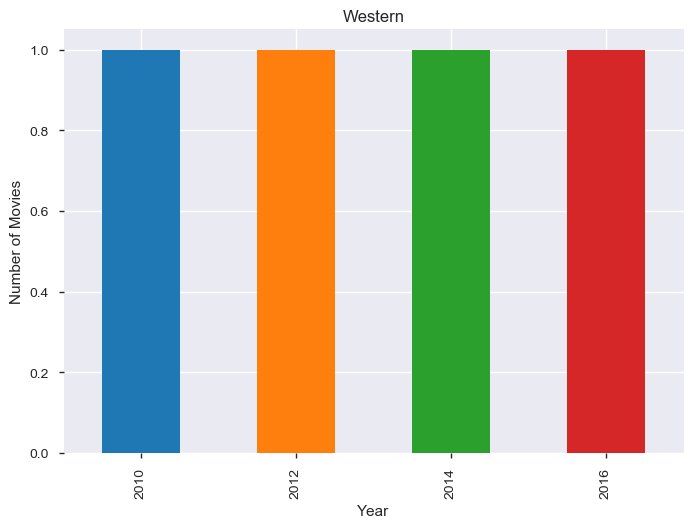

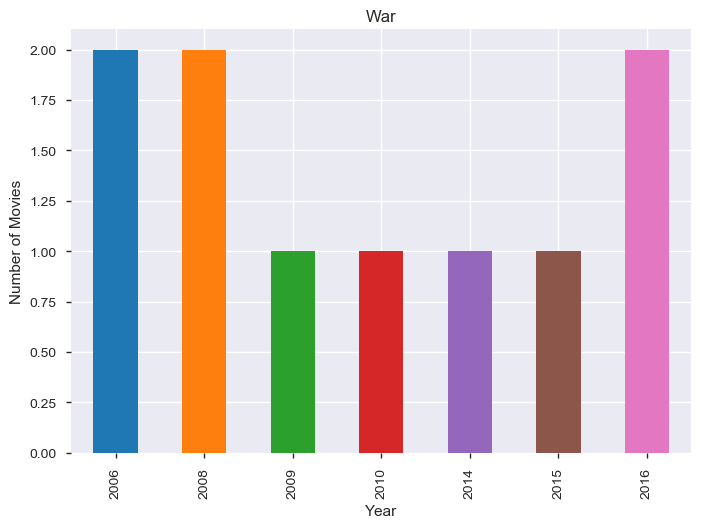

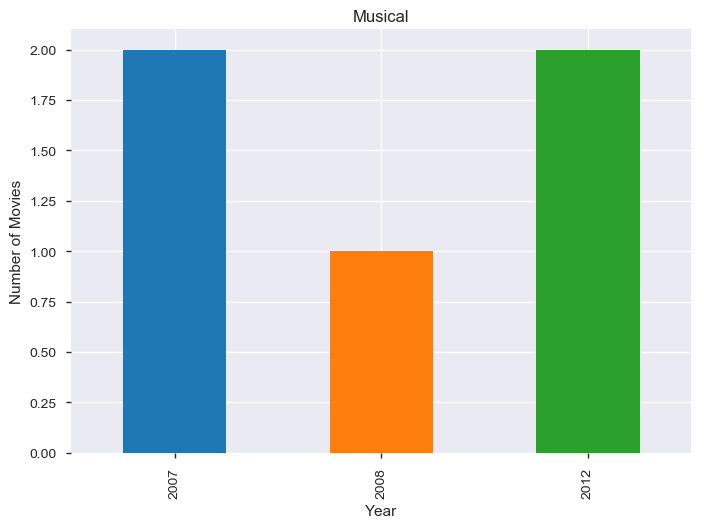

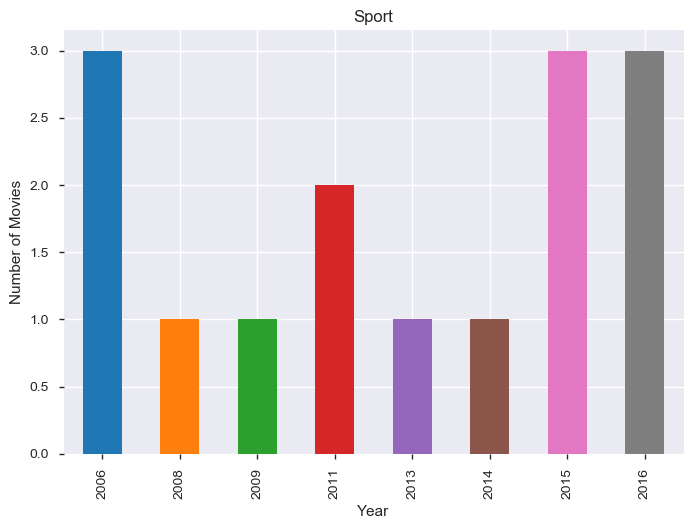

In [43]:
## genre count plot

# get the individual genre count

genre_movieCount = np.zeros(len(list(unique_genres)))

i = 0
for genre in unique_genres:
    current_genre = (movies['genre_1'] == genre) | (movies['genre_2'] == genre) | (movies['genre_3'] == genre)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.title(str(genre))
    movies[current_genre].year.value_counts().sort_index().plot.bar()
    # print(genre, len(movies[current_genre]))
    genre_movieCount[i] = len(movies[current_genre])
    i += 1

<a id='section609'></a>


#### 6.9 What are the top 10 genre according to movie count?

In [44]:
print (genre_movieCount)

genre_df = pd.DataFrame(genre_movieCount, index=unique_genres, columns=['MovieCount'])
genre_df

[277. 244.  87.  45. 250.  67. 419. 126.  86. 107.  92. 148.  48. 120.
  25.  15.   4.  10.   5.  15.]


MovieCount
Action          277.0
Adventure       244.0
Horror           87.0
Animation        45.0
Comedy          250.0
Biography        67.0
Drama           419.0
Crime           126.0
Mystery          86.0
Sci-Fi          107.0
Fantasy          92.0
Thriller        148.0
Family           48.0
Romance         120.0
History          25.0
Music            15.0
Western           4.0
War              10.0
Musical           5.0
Sport            15.0

Text(0.5, 1.0, 'Total Movies - Top 10 Genres')

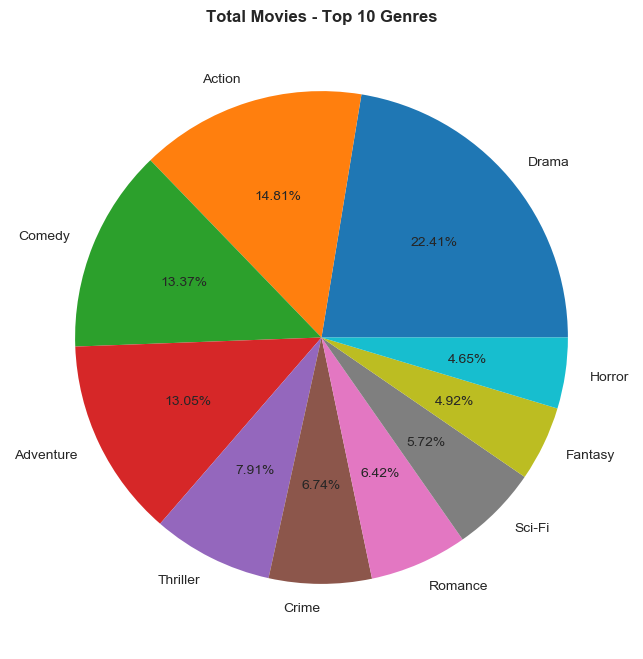

In [45]:
genre_df.sort_values(by='MovieCount', ascending=False).head(10).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Total Movies - Top 10 Genres', weight='bold')

Here , we can see that Drama genre has max no of movies

<a id ='section7'></a>

## Conclusion

-  Audience ratings of the movies are quite close to those of the critics ratings<br/>
-  Most movies last between 60 minutes and 120 minutes<br/>
-  Movies that are well rated by public and critics make the most money<br/>
-  Movies between 60 minutes and 150 minutes (2h30) make the most money<br/>
-  Movies that exceed 3 hours bring in the least money<br/>
-  The number of movies almost doubled from 2015 to 2016. Since 2013 there was good increase in the movie releases      year on year<br/>
-  There were few mystery, western or war movies<br/>
-  Movies that made the most money are action, drama and mystery movies<br/>
-  Star Wars: Episode VII - The Force Awakens has the highest revenue.<br/>
-  Drama has the highest no of movie count<br/>
-  Majority of the movies have rating between 6-8<br/>
-  Majority of the films that have good rating (>7) have a runtime between 80 - 120 minutes<br/>